In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.set_index(['PassengerId'])

replacing passenger ID

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 11)

In [7]:
#To find the columns with more unique variables
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age caabin and embarked is having Null values

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Need to encode objects.

Removing columns not needed

In [10]:
df = df.drop(['Name', 'Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


Imputing values

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [13]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Embarked'] = si.fit_transform(df['Embarked'].values.reshape(-1, 1))

Imputing done

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.000000,1,0,113803,53.1000,S
5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,211536,13.0000,S
888,1,1,female,19.000000,0,0,112053,30.0000,S
889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S


Label Encoding

In [16]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
df['Ticket'].nunique()

681

In [18]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
oe = OrdinalEncoder()
df['Ticket'] = oe.fit_transform(df['Ticket'].values.reshape (-1,1))

Encoding done

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,523.0,7.2500,2
2,1,1,0,38.0,1,0,596.0,71.2833,0
3,1,3,0,26.0,0,0,669.0,7.9250,2
4,1,1,0,35.0,1,0,49.0,53.1000,2
5,0,3,1,35.0,0,0,472.0,8.0500,2


Visualisation:

0    549
1    342
Name: Survived, dtype: int64


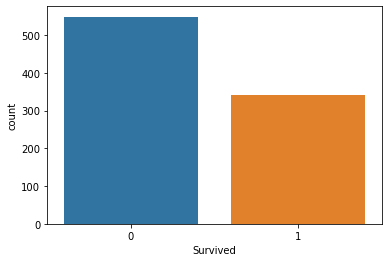

In [23]:
ax = sb.countplot(x = 'Survived', data = df)
print(df['Survived'].value_counts())

549 dead and 342 survived

3    491
1    216
2    184
Name: Pclass, dtype: int64


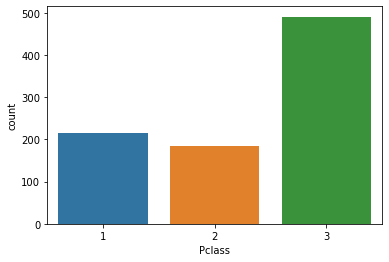

In [24]:
ax = sb.countplot(x = 'Pclass', data = df)
print(df['Pclass'].value_counts())

Class 1: 491, class 2: 216, class3: 184

1    577
0    314
Name: Sex, dtype: int64


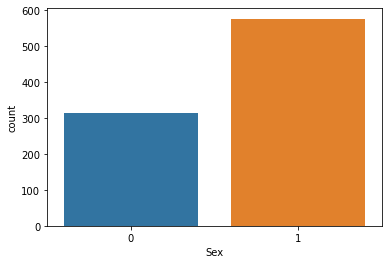

In [25]:
ax = sb.countplot(x = 'Sex', data = df)
print(df['Sex'].value_counts())

Male 577 female 314

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


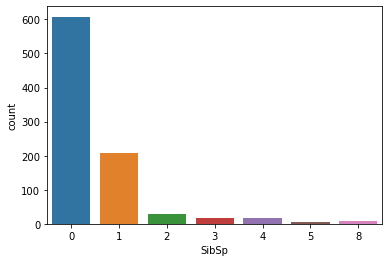

In [26]:
ax = sb.countplot(x = 'SibSp', data = df)
print(df['SibSp'].value_counts())

Most number of people on board were not accompanied by child or spouse

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


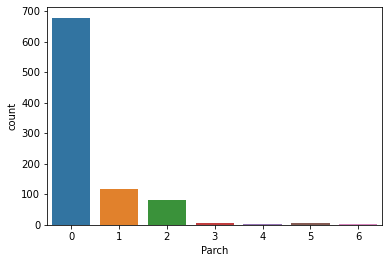

In [27]:
ax = sb.countplot(x = 'Parch', data = df)
print(df['Parch'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64


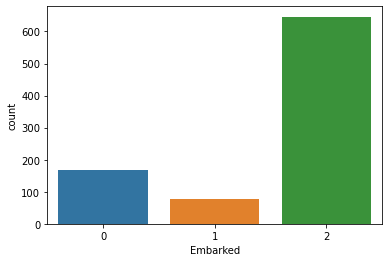

In [29]:
ax = sb.countplot(x = 'Embarked', data = df)
print(df['Embarked'].value_counts())

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64


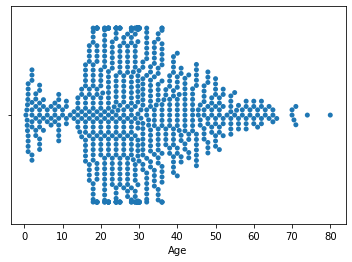

In [28]:
ax = sb.swarmplot(x = 'Age', data = df)
print(df['Age'].value_counts())

<AxesSubplot:xlabel='Sex', ylabel='Age'>

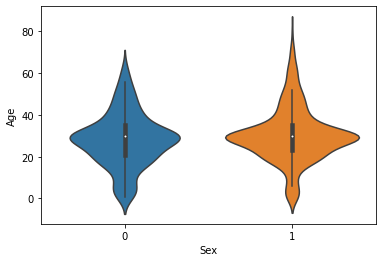

In [29]:
sb.violinplot(x = 'Sex', y = 'Age', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

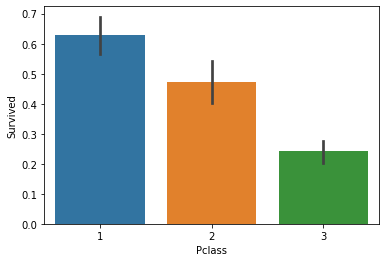

In [30]:
sb.barplot(x= "Pclass", y="Survived", data = df)

Class 1 people mostly survived.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

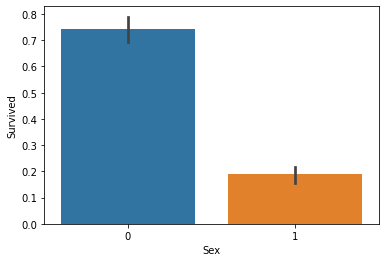

In [31]:
sb.barplot(x= "Sex", y="Survived", data = df)

Mostly women survived

<AxesSubplot:xlabel='Survived', ylabel='Age'>

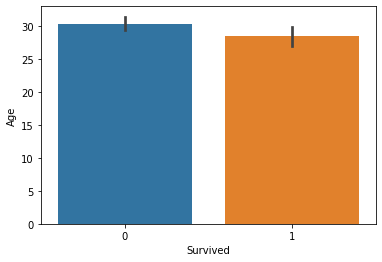

In [32]:
sb.barplot(x= "Survived", y="Age", data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

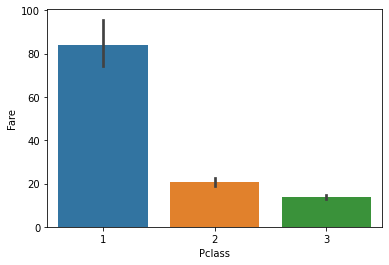

In [33]:
sb.barplot(x= "Pclass", y="Fare", data = df)

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

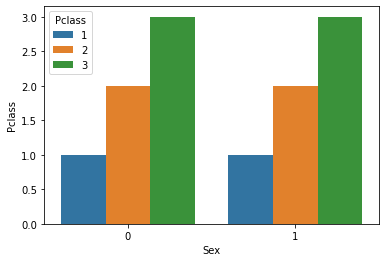

In [34]:
sb.barplot(x="Sex", y="Pclass", hue="Pclass", data=df) 

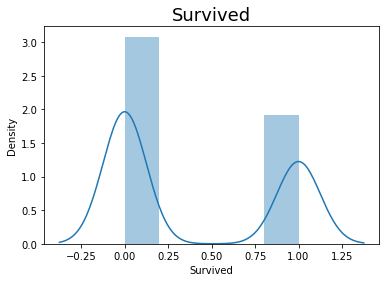

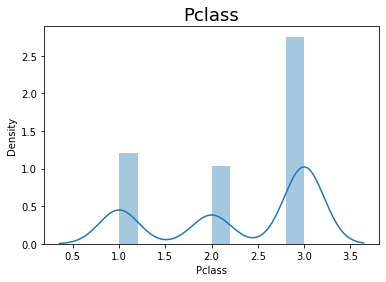

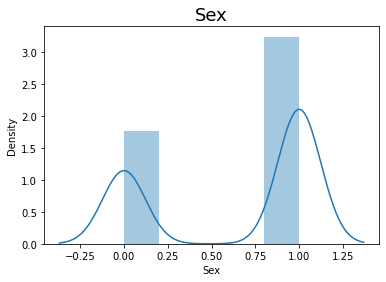

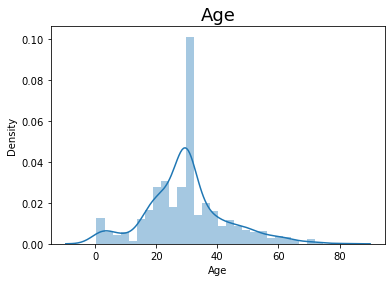

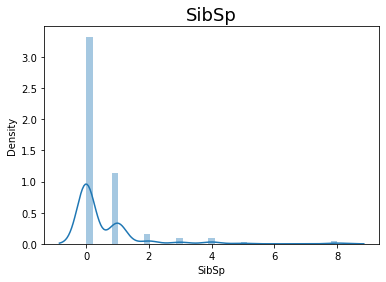

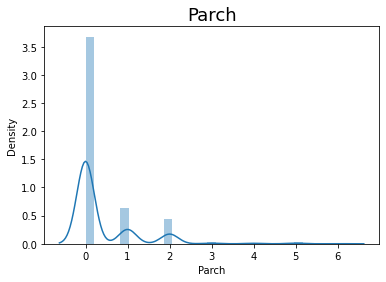

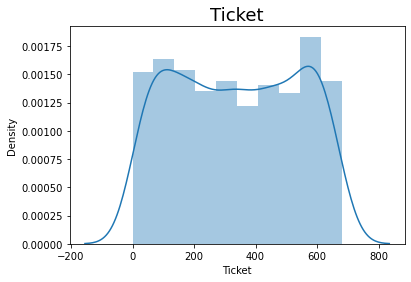

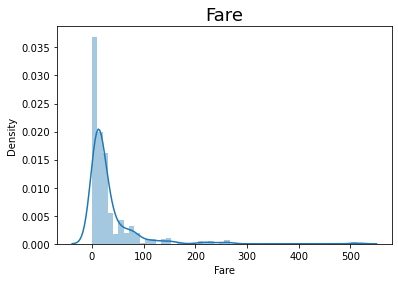

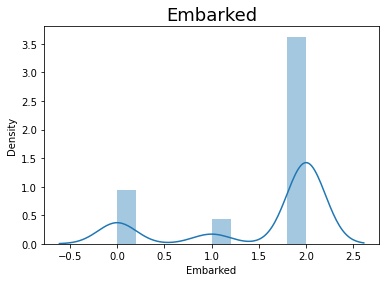

In [35]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked']

for i in col:
    sb.distplot(df[i], kde = True)
    plt.title(i, fontsize = 18)
    plt.show()

No numerical data is skewed.

### Describe the Dataset

In [36]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


Correlation

In [37]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,1.000000


<AxesSubplot:>

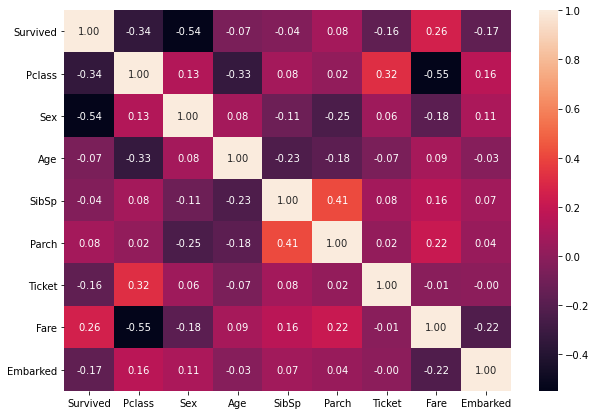

In [39]:

plt.figure(figsize = (10,7))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

ticket and Pclass & Parch and SibSp are highly correlated.

In [40]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Embarked   -1.264823
dtype: float64

limit is -0.5 to 0.5

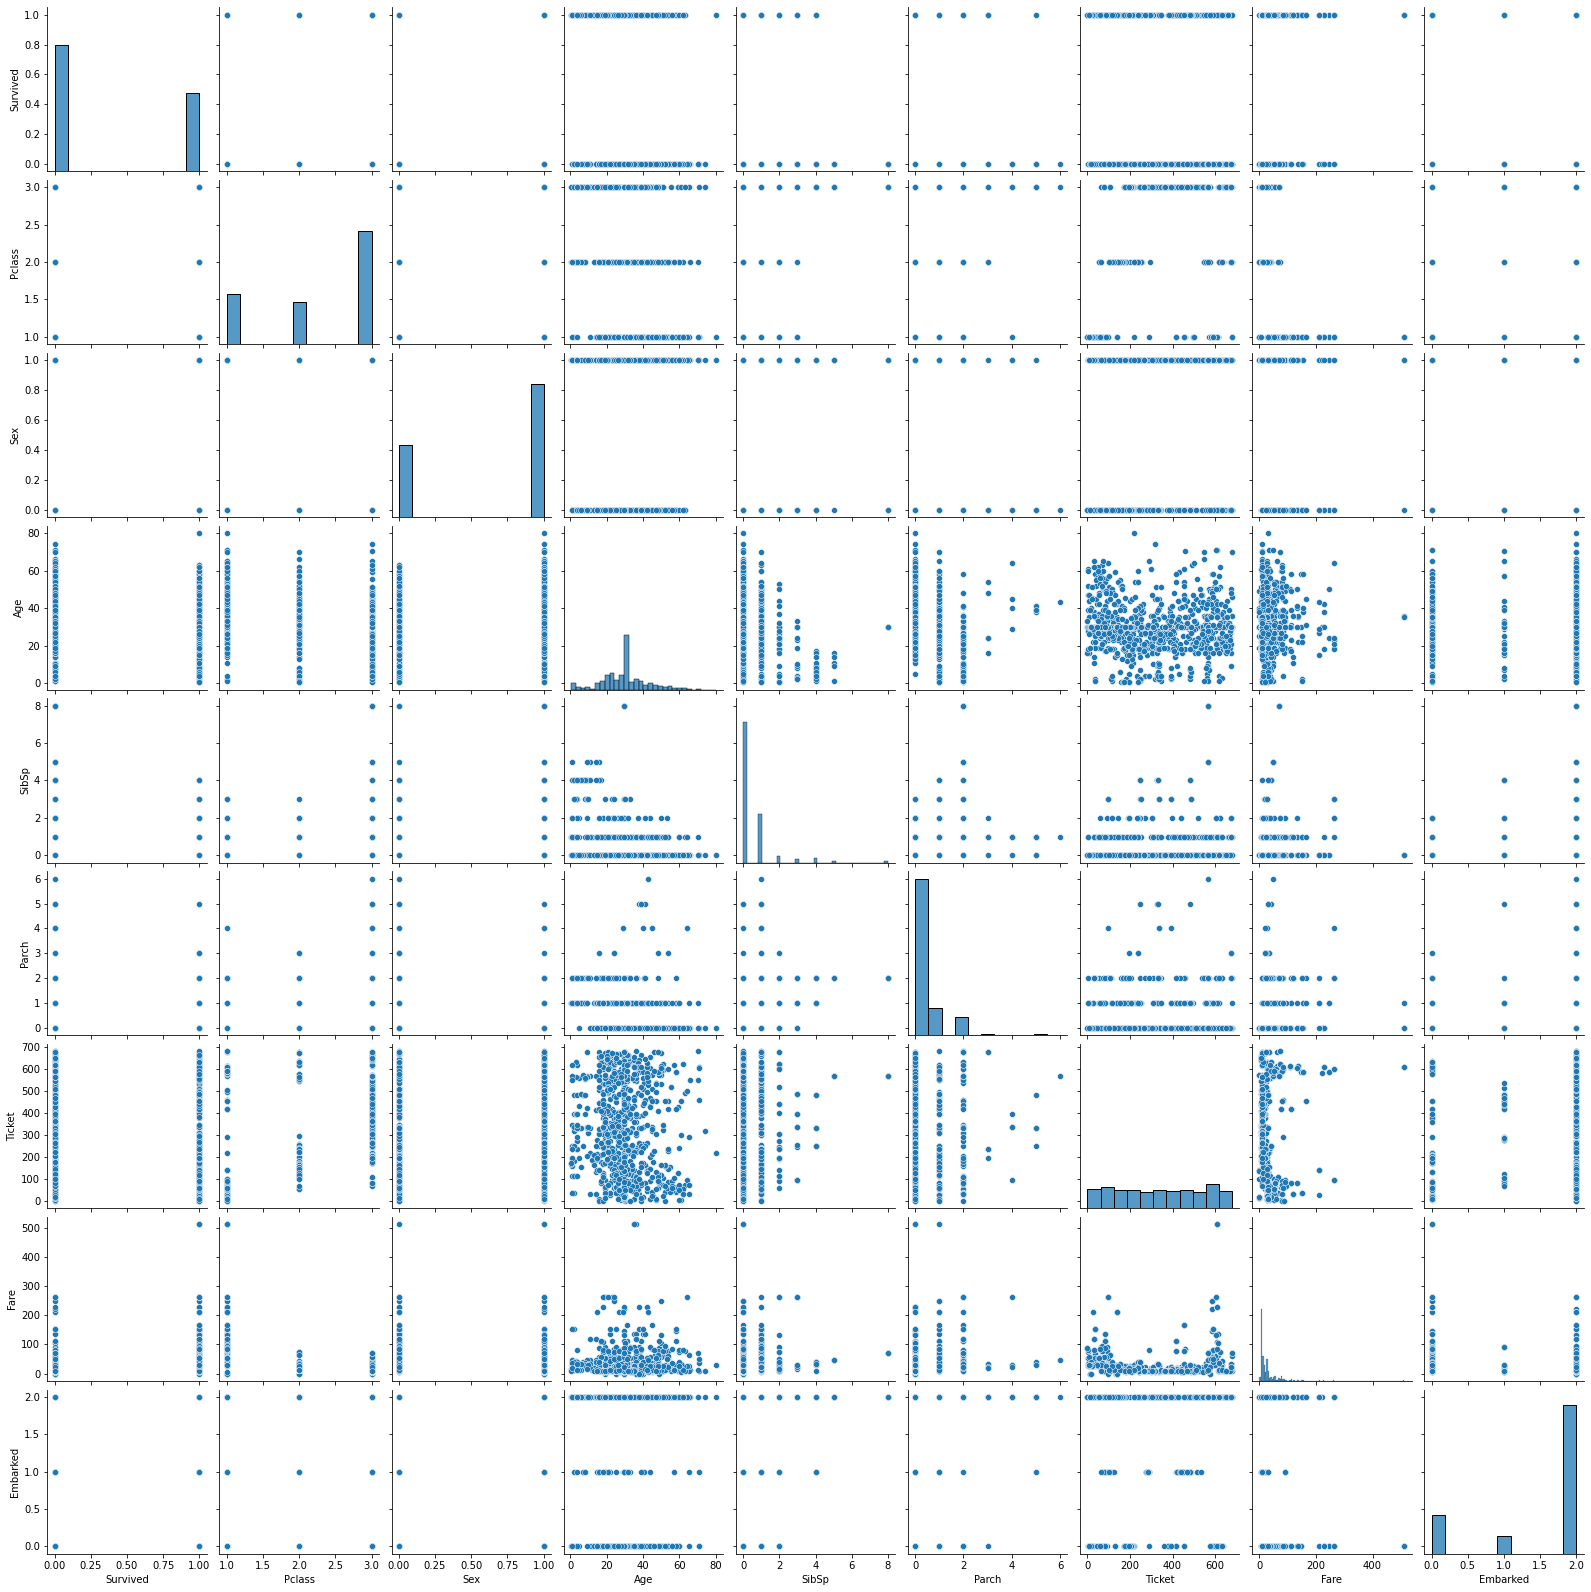

In [41]:
sb.pairplot(df)

Oulier removal

In [43]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 7, 4, 4, 4, 4, 5, 7, 3, 3, 7, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        7, 4, 4, 4, 7, 7, 4, 7, 5, 7, 7, 4, 5, 5, 7, 4, 3, 7, 4, 4, 7, 5,
        5, 3, 5, 3, 5, 7, 4, 4, 7, 7, 7, 7, 5, 7, 7, 3, 5, 7, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [44]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.000000,1,0,523.0,7.2500,2
2,1,1,0,38.000000,1,0,596.0,71.2833,0
3,1,3,0,26.000000,0,0,669.0,7.9250,2
4,1,1,0,35.000000,1,0,49.0,53.1000,2
5,0,3,1,35.000000,0,0,472.0,8.0500,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,101.0,13.0000,2
888,1,1,0,19.000000,0,0,14.0,30.0000,2
889,0,3,0,29.699118,1,2,675.0,23.4500,2


In [45]:
df_new.shape

(820, 9)

Splitting

In [46]:
x = df.iloc[:, 1:8]
y = df.iloc[:, 0]

In [47]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,
1,3,1,22.0,1,0,523.0,7.2500
2,1,0,38.0,1,0,596.0,71.2833
3,3,0,26.0,0,0,669.0,7.9250
4,1,0,35.0,1,0,49.0,53.1000
5,3,1,35.0,0,0,472.0,8.0500


In [48]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [50]:
x = ms.fit_transform(x)

In [51]:
x.shape

(891, 7)

In [52]:
y.shape

(891,)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 19)

In [55]:
x_train.shape

(623, 7)

In [56]:
x_test.shape

(268, 7)

In [57]:
y_train.shape

(623,)

In [58]:
y_test.shape

(268,)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [64]:
lg=LogisticRegression()
gnb = GaussianNB()
mnb = MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

In [66]:
model = [gnb, mnb, knn, dtc, svc, rfc, abc,lg]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  GaussianNB()
0.7873134328358209
[[133  33]
 [ 24  78]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       166
           1       0.70      0.76      0.73       102

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Accuracy Score  :  MultinomialNB()
0.6604477611940298
[[164   2]
 [ 89  13]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.78       166
           1       0.87      0.13      0.22       102

    accuracy                           0.66       268
   macro avg       0.76      0.56      0.50       268
weighted avg       0.73      0.66      0.57       268

Accuracy Score  :  KNeighborsClassifier()
0.8059701492537313
[[149  17]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       166
  

Cross validation

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [gnb, mnb, knn, dtc, svc, rfc, abc,lg]
for m in model:
    print(m)
    score=cross_val_score(m,x,y,cv=5)
    print('Cross val score accuracy score is \n',score)
    print('Mean \n', score.mean())
    print('Std \n',score.std())
    y_pred=cross_val_predict(m,x,y,cv=5)
    print('y prediction \n',y_pred)
    print('\n\n')
    

GaussianNB()
Cross val score accuracy score is 
 [0.74301676 0.75280899 0.78651685 0.78651685 0.79775281]
Mean 
 0.7733224530789028
Std 
 0.021374115103984067
y prediction 
 [0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1
 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 

Cross val score accuracy score is 
 [0.79888268 0.82022472 0.84269663 0.83707865 0.87078652]
Mean 
 0.8339338396836358
Std 
 0.023922039253145847
y prediction 
 [0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0

Best model is svc

GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'kernel':['rbg', 'ploy','linear']}
sv = SVC()
gscv = GridSearchCV(abc, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'kernel': 'linear'}


In [77]:
svf = SVC(kernel = 'linear')
svf.fit(x_train, y_train)
pred_svf = svf.predict(x_test)
print('Accuracy Score  : ', svf)
print(accuracy_score(y_test, pred_svf))
print(confusion_matrix(y_test, pred_svf))
print(classification_report(y_test, pred_svf))

Accuracy Score  :  SVC(kernel='linear')
0.8022388059701493
[[149  17]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       166
           1       0.80      0.65      0.71       102

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



We're getting an average of 80.22% comparing accuracy score of and cross val score. 

In [78]:
data = [pred_svf, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual,0,0,0,1,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0


### Creating the OBJ file

In [79]:
import joblib

In [75]:
joblib.dump(abc_final, 'titanic.obj')

['Titanic.obj']

### Conclusion

In [76]:
final = joblib.load('Titanic.obj')
final.predict(x_train)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,